# Pandas

- Methods to deal with tabular data
- These methods are to replicate what `dplyr` in R is capable of
- The `statsmodels` can download R datasets from https://vincentarelbundock.github.io/Rdatasets/datasets.html

## Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
%matplotlib inline

## Importing/Exporting Data

Importing:

- `pd.read_csv(filename)`: From a CSV file
- `pd.read_table(filename)`: From a delimited text file (like TSV)
- `pd.read_excel(filename)`: From an Excel file
- `pd.read_sql(query, connection_object)`: Read from a SQL table/database
- `pd.read_json(json_string)`: Read from a JSON formatted string, URL or file.
- `pd.read_html(url)`: Parses an html URL, string or file and extracts tables to a list of dataframes
- `pd.read_clipboard()`: Takes the contents of your clipboard and passes it to read_table()
- `pd.DataFrame(dict)`: From a dict, keys for columns names, values for data as lists
- `pd.DataFrame(list of tuples)`: From a list, which includes the records of each row

Exporting:

- `df.to_csv(filename)` 
- `df.to_excel(filename)` 
- `df.to_sql(table_name, connection_object)` 
- `df.to_json(filename)`

In [2]:
DEMO_DATA_DIR = '../../../RepositoryData/data/titanic/'
iris = sm.datasets.get_rdataset('iris').data
titanic = pd.read_csv(DEMO_DATA_DIR+'train.csv')

In [3]:
x= [(1,2,3,4),
   (5,6,7,8),
   (9,10,11,12)]
pd.DataFrame(x,columns=["A","B","C","D"])

,A,B,C,D
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [4]:
x = {"A":[1,2,3,4],
    "B":[5,6,7,8],
    "C":[9,10,11,12]}
pd.DataFrame(x)

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


```{note}
When you have data of the **columns**, use **dict**; when you have the data of the **rows**, use **list** as the source data structures of a data frame.
```

## Inspecting Data Frame

- `df.head(n)`: First n rows of the DataFrame
- `df.tail(n)`: Last n rows of the DataFrame
- `df.shape`: Number of rows and columns
- `df.info()`: Index, Datatype and Memory information
- `df.describe()`: Summary statistics for numerical columns
- `s.value_counts(dropna=False)`: View unique values and counts
- `df.apply(pd.Series.value_counts)`: Unique values and counts for all columns
- `df.columns`
- `df.index`
- `df.dtypes`
- `df.set_index('column_name')`: Set a column as the index 

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print(iris.shape)
iris.head(3)

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [8]:
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
iris['Species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [10]:
titanic.apply(pd.Series.value_counts)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,549.0,NaN,NaN,NaN,NaN,608.0,678.0,NaN,15.0,NaN,NaN
0.42,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
0.67,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
0.75,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
0.83,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
female,NaN,NaN,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
male,NaN,NaN,NaN,NaN,577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(iris.columns)
print(titanic.columns)
print(iris.index)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
RangeIndex(start=0, stop=150, step=1)


In [12]:
print(iris.dtypes)
print(titanic.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Basic Functions

In [13]:
## DataFrame attributes
iris.shape
iris.columns
iris.index
iris.info()
iris.describe()
iris.dtypes # check column data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

## Subsetting Data Frame

- `df[col]`: Returns column with label col as Series
- `df[[col1, col2]]`: Returns columns as a new DataFrame
- `s.iloc[0]`: Selection by position
- `s.loc['index_one']`: Selection by index
- `df.iloc[0,:]`: First row
- `df.iloc[0,0]`: First element of first column

In [14]:
iris.loc[:5, 'Species'] # first six rows of 'Species' column

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: Species, dtype: object

In [15]:
iris.iloc[:5, 4] # same as above

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

## Exploration


How to perform the key functions provided in R `dplyr`?

- `dplyr` Key Verbs
    - `filter()`
    - `select()`
    - `mutate()`
    - `arrange()`
    - `summarize()`
    - `group_by()`

### NA Values


Functions to take care of `NA` values:
    
- `df.isnull()`
- `df.notnull()`
- `df.dropna()`: Drop rows with null values
- `df.dropna(axis=1)`: Drop columns with null values
- `df.dropna(axis=1, thresh=n)`: Drop all columns have less than n non-values
- `df.fillna(x)`: Replaces all null values with `x`
- `s.fillna(s.mean())`: Replace the null values of a Series with its mean score

- Quick check of the null values in each column

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic.dropna(axis=1, thresh=600)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [18]:
titanic.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Converting Data Types

- `s.astype(float)`: Convert a Series into a `float` type


In [19]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [20]:
iris['Species']=iris['Species'].astype('category')
iris.dtypes
#iris.value_counts(iris['Species']).plot.bar()

Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
Species         category
dtype: object

### Pandas-supported Data Types

![pandas-dtypes](../images/pandas-dtypes.png)

([source](https://pbpython.com/pandas_dtypes.html))


### Transformation


- `s.replace(X, Y)`

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

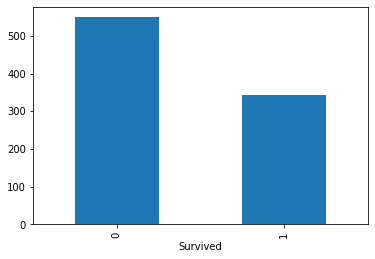

In [21]:
titanic.head()
titanic.value_counts(titanic['Survived']).plot.bar()
titanic.columns
titanic.groupby(['Sex','Pclass']).mean()
titanic[titanic['Age']<18].groupby(['Sex','Pclass']).mean()

###  `filter()`

In [22]:
## filter
iris[iris['Sepal.Length']>5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


```{note}
When there are more than one filtering condition, put the conditions in parentheses.
```

In [23]:
iris[(iris['Sepal.Length']>4) & (iris['Sepal.Width']>5)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species


In [24]:
iris.query('`Sepal.Length`>5')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
iris[(iris['Sepal.Length']>5) & (iris['Sepal.Width']>4)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


### `arrange()`

In [26]:
iris.sort_values(['Species','Sepal.Length'], ascending=[False,True])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
106,4.9,2.5,4.5,1.7,virginica
121,5.6,2.8,4.9,2.0,virginica
113,5.7,2.5,5.0,2.0,virginica
101,5.8,2.7,5.1,1.9,virginica
114,5.8,2.8,5.1,2.4,virginica
...,...,...,...,...,...
33,5.5,4.2,1.4,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa


### `select()`

In [27]:
## select
iris[['Sepal.Length', 'Species']]

,Sepal.Length,Species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


In [28]:
## deselect columns
iris.drop(['Sepal.Length'], axis=1).head()

,Sepal.Width,Petal.Length,Petal.Width,Species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [29]:
iris.filter(['Species','Sepal.Length'])

,Species,Sepal.Length
0,setosa,5.1
1,setosa,4.9
2,setosa,4.7
3,setosa,4.6
4,setosa,5.0
...,...,...
145,virginica,6.7
146,virginica,6.3
147,virginica,6.5
148,virginica,6.2


In [30]:
iris[['Species','Sepal.Length']]

,Species,Sepal.Length
0,setosa,5.1
1,setosa,4.9
2,setosa,4.7
3,setosa,4.6
4,setosa,5.0
...,...,...
145,virginica,6.7
146,virginica,6.3
147,virginica,6.5
148,virginica,6.2


In [31]:
## extract one particular column
sepal_length = iris['Sepal.Length']
type(sepal_length)

pandas.core.series.Series

### `mutate()`

In [32]:
## mutate
iris['Species_new'] = iris['Species'].apply(lambda x: len(x))
iris['Species_initial'] = iris['Species'].apply(lambda x: x[:2].upper())
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_new,Species_initial
0,5.1,3.5,1.4,0.2,setosa,6,SE
1,4.9,3.0,1.4,0.2,setosa,6,SE
2,4.7,3.2,1.3,0.2,setosa,6,SE
3,4.6,3.1,1.5,0.2,setosa,6,SE
4,5.0,3.6,1.4,0.2,setosa,6,SE
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9,VI
146,6.3,2.5,5.0,1.9,virginica,9,VI
147,6.5,3.0,5.2,2.0,virginica,9,VI
148,6.2,3.4,5.4,2.3,virginica,9,VI


In [33]:
## mutate alternative 2
iris.assign(Specias_initial2 = iris['Species'].apply(lambda x: x.upper()))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_new,Species_initial,Specias_initial2
0,5.1,3.5,1.4,0.2,setosa,6,SE,SETOSA
1,4.9,3.0,1.4,0.2,setosa,6,SE,SETOSA
2,4.7,3.2,1.3,0.2,setosa,6,SE,SETOSA
3,4.6,3.1,1.5,0.2,setosa,6,SE,SETOSA
4,5.0,3.6,1.4,0.2,setosa,6,SE,SETOSA
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9,VI,VIRGINICA
146,6.3,2.5,5.0,1.9,virginica,9,VI,VIRGINICA
147,6.5,3.0,5.2,2.0,virginica,9,VI,VIRGINICA
148,6.2,3.4,5.4,2.3,virginica,9,VI,VIRGINICA


### `apply()`, `mutate_if()`

- `df.apply(np.mean)`: Apply a function to all columns
- `df.apply(np.max,axis=1)`: Apply a function to each row

```{note}
When `apply()` functions to the data frame, the `axis=1` refers to row mutation and `axis=0` refers to column mutation. This is very counter-intuitive for R users.
```

In [34]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_new,Species_initial
0,5.1,3.5,1.4,0.2,setosa,6,SE
1,4.9,3.0,1.4,0.2,setosa,6,SE
2,4.7,3.2,1.3,0.2,setosa,6,SE
3,4.6,3.1,1.5,0.2,setosa,6,SE
4,5.0,3.6,1.4,0.2,setosa,6,SE
5,5.4,3.9,1.7,0.4,setosa,6,SE
6,4.6,3.4,1.4,0.3,setosa,6,SE
7,5.0,3.4,1.5,0.2,setosa,6,SE
8,4.4,2.9,1.4,0.2,setosa,6,SE
9,4.9,3.1,1.5,0.1,setosa,6,SE


In [35]:
iris[['Sepal.Width','Petal.Width']].apply(np.sum, axis=1).head(10)

0    3.7
1    3.2
2    3.4
3    3.3
4    3.8
5    4.3
6    3.7
7    3.6
8    3.1
9    3.2
dtype: float64

### `group_by()` and `summarize()`

In [36]:
iris.groupby(by='Species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [37]:
iris.filter(['Species','Sepal.Length']).groupby('Species').agg({'Sepal.Length':['mean','count','std']})


Sepal.Length                
                   mean count       std
Species                                
setosa            5.006    50  0.352490
versicolor        5.936    50  0.516171
virginica         6.588    50  0.635880

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic.groupby(['Pclass','Sex']).agg(np.sum)

PassengerId  Survived      Age  SibSp  Parch       Fare
Pclass Sex                                                            
1      female        44106        91  2942.00     52     43  9975.8250
       male          55599        45  4169.42     38     34  8201.5875
2      female        33676        70  2125.50     37     46  1669.7292
       male          48380        17  3043.33     37     24  2132.1125
3      female        57561        72  2218.50    129    115  2321.1086
       male         158064        47  6706.42    173     78  4393.5865

In [40]:
titanic.pivot_table(index=['Pclass','Sex'], values=['Survived'], aggfunc=np.sum)

Survived
Pclass Sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47

### `rename()`


In [41]:
iris
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species',
       'Species_new', 'Species_initial'],
      dtype='object')

- Selective renaming column names

In [42]:
iris = iris.rename(columns={'Sepal.Length':'SLen'})
iris

,SLen,Sepal.Width,Petal.Length,Petal.Width,Species,Species_new,Species_initial
0,5.1,3.5,1.4,0.2,setosa,6,SE
1,4.9,3.0,1.4,0.2,setosa,6,SE
2,4.7,3.2,1.3,0.2,setosa,6,SE
3,4.6,3.1,1.5,0.2,setosa,6,SE
4,5.0,3.6,1.4,0.2,setosa,6,SE
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9,VI
146,6.3,2.5,5.0,1.9,virginica,9,VI
147,6.5,3.0,5.2,2.0,virginica,9,VI
148,6.2,3.4,5.4,2.3,virginica,9,VI


- Massive renaming column names

In [43]:
iris.rename(columns=lambda x: 'XX'+x)

,XXSLen,XXSepal.Width,XXPetal.Length,XXPetal.Width,XXSpecies,XXSpecies_new,XXSpecies_initial
0,5.1,3.5,1.4,0.2,setosa,6,SE
1,4.9,3.0,1.4,0.2,setosa,6,SE
2,4.7,3.2,1.3,0.2,setosa,6,SE
3,4.6,3.1,1.5,0.2,setosa,6,SE
4,5.0,3.6,1.4,0.2,setosa,6,SE
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9,VI
146,6.3,2.5,5.0,1.9,virginica,9,VI
147,6.5,3.0,5.2,2.0,virginica,9,VI
148,6.2,3.4,5.4,2.3,virginica,9,VI


In [44]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [45]:
titanic.set_index('Name').rename(index=lambda x:x.replace(' ',"_").upper())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"BRAUND,_MR._OWEN_HARRIS",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"CUMINGS,_MRS._JOHN_BRADLEY_(FLORENCE_BRIGGS_THAYER)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"HEIKKINEN,_MISS._LAINA",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"FUTRELLE,_MRS._JACQUES_HEATH_(LILY_MAY_PEEL)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"ALLEN,_MR._WILLIAM_HENRY",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"MONTVILA,_REV._JUOZAS",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"GRAHAM,_MISS._MARGARET_EDITH",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"JOHNSTON,_MISS._CATHERINE_HELEN_""CARRIE""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Join/Combine Data Frames

- `df1.append(df2)`: Add the rows in df1 to the end of df2 (columns should be identical) (`rbind()` in R)
- `pd.concat([df1, df2],axis=1)`: Add the columns in df1 to the end of df2 (rows should be identical) (`cbind()` in R)
- `df1.join(df2,on=col1,how='inner')`: SQL-style join the columns in df1 with the columns on df2 where the rows for col have identical values. 'how' can be one of 'left', 'right', 'outer', 'inner'



## Statistics

- `df.describe()`: Summary statistics for numerical columns
- `df.mean()`: Returns the mean of all columns
- `df.corr()`: Returns the correlation between columns in a DataFrame
- `df.count()`: Returns the number of non-null values in each DataFrame column
- `df.max()`: Returns the highest value in each column
- `df.min()`: Returns the lowest value in each column
- `df.median()`: Returns the median of each column
- `df.std()`: Returns the standard deviation of each column

In [46]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [47]:
titanic.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

## Generic Functions

- `pandas.pivot_table()`
- `pandas.crosstab()`
- `pandas.cut()`
- `pandas.qcut()`
- `pandas.merge()`
- `pandas.get_dummies()`

## References

 - [Python for Data Analysis](https://www.amazon.com/gp/product/1491957662/ref=as_li_tl_nodl?ie=UTF8&camp=1789&creative=9325&creativeASIN=1491957662&linkCode=as2&tag=ledoux-20&linkId=eff92247940c967299befaed855c580a)
 - [Python for Data Analysis GitHub](https://github.com/wesm/pydata-book)
 - [How to get sample datasets in Python](https://stackoverflow.com/questions/28417293/sample-datasets-in-pandas)


## Requirements

In [48]:
# %load get_modules.py
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
        
        
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

statsmodels==0.12.0
pandas==1.1.2
numpy==1.18.1
matplotlib==3.3.2
